In [13]:
%matplotlib inline

# Import liberies
from PIL import Image
import   numpy  as np   
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import   time

In [14]:
def MyCircleKern(radius):
    # define the size of the kernel
    kernel_size = (2 * radius) + 1

    # create a meshgrid to represent the coordinates of the kernel
    x, y = np.meshgrid(np.arange(kernel_size), np.arange(kernel_size))

    # calculate the distance of each pixel from the center of the kernel
    distance = np.sqrt((x - radius)**2 + (y - radius)**2)

    # create a circular kernel by setting all pixels within the radius to 1 and the rest to 0
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.uint8)
    kernel[distance <= radius] = 1
    
    return kernel

In [15]:
def MyErode(image, radius):
    # create a circular kernel with the given radius
    kernel = MyCircleKern(radius)
    
    # calculate the size of the kernel
    border = kernel.shape[0] // 2
    
    # create an output image with the same size as the input image
    output = np.zeros_like(image)
    
    # iterate over each pixel in the image
    for i in range(border, image.shape[0] - border):
        for j in range(border, image.shape[1] - border):
            # extract the current region of interest (ROI) from the input image
            roi = image[i - border:i + border + 1, j - border:j + border + 1]
            
            # apply the erosion operation by taking the minimum value in the ROI and avoid 0 values
            kernel_values = kernel[kernel != 0]
            roi_values = roi[kernel != 0]

            output[i, j] = np.min(roi_values * kernel_values)
    
    return output


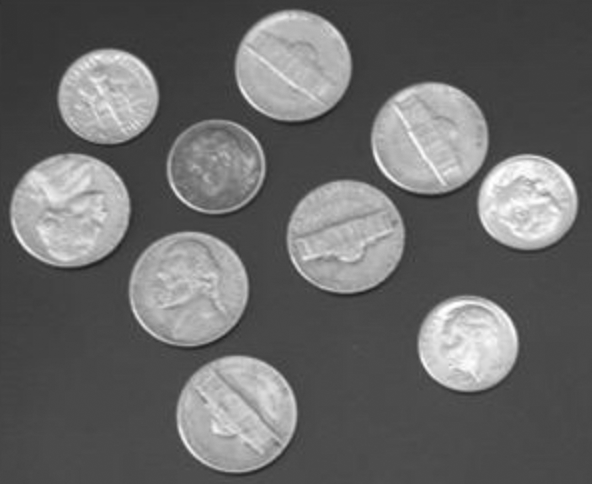

In [16]:
img = Image.open("coins.bmp")
img2 = np.array(img)
img

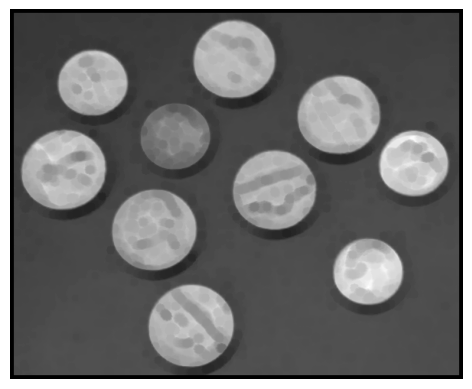

In [17]:
output = MyErode(img2, 5)

plt.imshow(output, cmap='gray')
plt.axis(False)
plt.show()

In [18]:
def MyDilate(image, radius):
    # create a circular kernel with the given radius
    kernel = MyCircleKern(radius)
    
    # calculate the size of the kernel
    border = kernel.shape[0] // 2
    
    # create an output image with the same size as the input image
    output = np.zeros_like(image)
    
    # iterate over each pixel in the image
    for i in range(border, image.shape[0] - border):
        for j in range(border, image.shape[1] - border):
            # extract the current region of interest (ROI) from the input image
            roi = image[i - border:i + border + 1, j - border:j + border + 1]
            
            # apply the erosion operation by taking the minimum value in the ROI and avoid 0 values
            output[i, j] = np.max(roi * kernel)
    
    return output

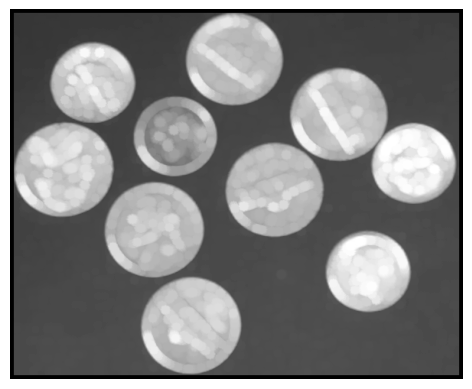

In [19]:
output = MyDilate(img2, 5)

plt.imshow(output, cmap='gray')
plt.axis(False)
plt.show()

In [20]:
def MyOpening(image, radius):
    return MyDilate(MyErode(image, radius), radius)

def MyClosing(image, radius):
    return MyErode(MyDilate(image, radius), radius)

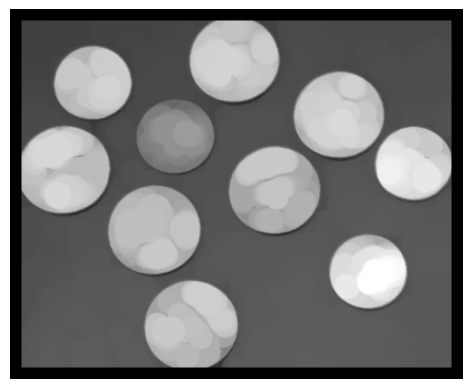

In [21]:
output = MyOpening(img2, 15)

plt.imshow(output, cmap='gray')
plt.axis(False)
plt.show()

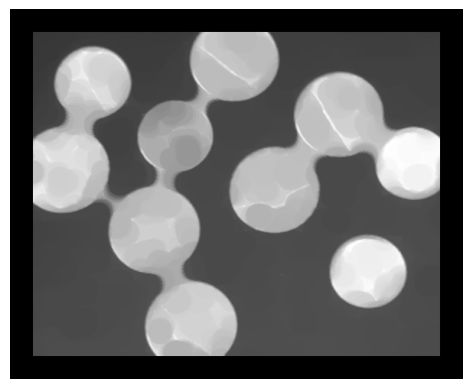

In [22]:
output = MyClosing(img2, 15)

plt.imshow(output, cmap='gray')
plt.axis(False)
plt.show()

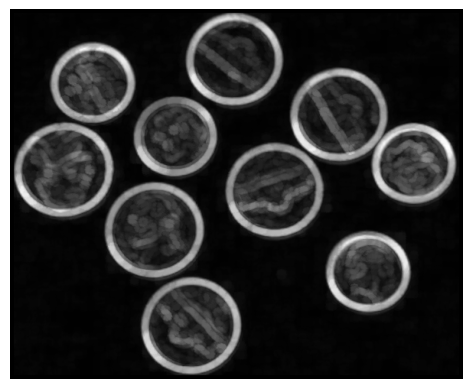

In [23]:
output = MyDilate(img2, 5) - MyErode(img2, 5)

plt.imshow(output, cmap='gray')
plt.axis(False)
plt.show()

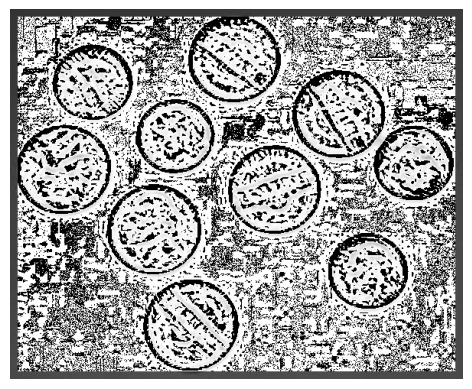

In [24]:
output = img2 - MyClosing(img2, 5)

plt.imshow(output, cmap='gray')
plt.axis(False)
plt.show()